In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# class 구조
# class class_name:
# ....statements

In [3]:
class account:
    def __init__(self, name, initial_money):
        self.name = name
        self.transaction_history = [initial_money]
        print("%s의 계좌가 %.2f원을 입금하여 개설되었습니다." %(self.name, self.transaction_history[-1]))
        
    def save_money(self, amount):
        self.transaction_history += [self.transaction_history[-1] + amount]
        print("%.2f원을 예금하여 총 자산은 %.2f원이 되었습니다. "%(amount, self.transaction_history[-1]))
        pass
    
    def status(self):
        print("예금주 : %s   잔액 : %.2f" %(self.name, self.transaction_history[-1]))
        pass
    
    def withrow_money(self, amount):
        self.transaction_history += [self.transaction_history[-1] - amount]
        print("%.2f원을 인출하여 총 자산은 %.2f원이 되었습니다. "%(amount, self.transaction_history[-1]))
        pass
        
    def history(self):
        plt.plot(self.transaction_history, 'k-')
        return plt.show()

In [4]:
account1 = account('홍두깨', 10000)

홍두깨의 계좌가 10000.00원을 입금하여 개설되었습니다.


In [5]:
account2 = account('하니', 6000)

하니의 계좌가 6000.00원을 입금하여 개설되었습니다.


In [6]:
# account 정보 수정.. 이름 변경 예시 
account2.name = '홍하니'
account2.status()

예금주 : 홍하니   잔액 : 6000.00


In [7]:
account2.save_money(2000)

2000.00원을 예금하여 총 자산은 8000.00원이 되었습니다. 


In [8]:
account1.status()

예금주 : 홍두깨   잔액 : 10000.00


In [9]:
account2.withrow_money(1000)

1000.00원을 인출하여 총 자산은 7000.00원이 되었습니다. 


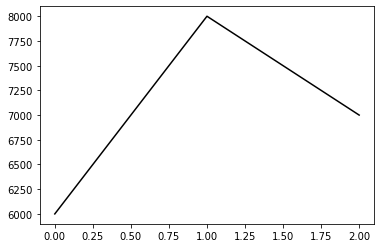

In [10]:
account2.history()

In [11]:
class perceptron:
    
    def __init__(self, clo, clx):
        self.clo = clo # class O
        self.clx = clx # class X
        self.data_dim = len(self.clo[0])
        self.bias = np.random.normal()
        self.weights = np.random.normal(size=self.data_dim)
        
    def forward(self, pt):
        return self.bias + np.dot(self.weights, pt) 
    
    def predict(self, pt):
        if self.forward(pt) > 0:
            return 1
        else:
            return -1
    
    def visualize(self, db_op = False):
        assert self.data_dim ==2
        
        plt.figure(figsize=(5,5))
        for pt in self.clo:
            plt.plot(pt[0], pt[1], 'ro', markersize = 20)
        for pt in self.clx:
            plt.plot(pt[0],pt[1], 'bx', markersize = 20)
    
        if db_op:
            xmin = min([pt[0] for pt in self.clx + self.clo])
            xmax = max([pt[0] for pt in self.clx + self.clo]) 
    
            xrange = np.linspace(xmin,xmax, int((xmax-xmin)*100))
            w1 = self.weights[0]
            w2 = self.weights[1]
            b  = self.bias
            line = lambda x : - w1*x / w2 - b / w2 
            y = line(xrange)
            max_y = max(np.max(y) , max([pt[1] for pt in self.clo+self.clx]) )
            plt.plot(xrange, y , 'k--', lw=5)
            plt.fill_between(xrange, y, [max_y for _ in xrange], alpha=0.5, color='blue')
        return plt.show()

In [21]:
np.random.normal(size=3)

array([-1.22772046,  0.51109385, -0.00722997])

In [13]:
aa = [[-1,0],[0,1]]
bb = [[1,0], [1,1]]
p1 = perceptron(aa,bb)

In [14]:
p1.predict([1,1])

1

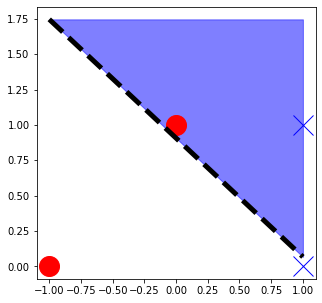

In [15]:
p1.visualize(True)

In [16]:
class trainer:
    def __init__(self, perceptron):
        self.pcr = perceptron
        self.clo = self.pcr.clo
        self.clx = self.pcr.clx
        print("테스트 데이터 분류 성공 퍼센트는 %.2f%%입니다." %self.test()[1])
        
        
    def test(self):
        s_count = 0
        self.incorrect = []
        for pt in self.clo + self.clx:
            t = 2*int(pt in self.clo) - 1
            y = self.pcr.predict(pt)
            if t*y > 0:
                s_count +=1
            else:
                self.incorrect.append(pt)
        self.ratio = 100*s_count / (len(self.clo+self.clx))
        return self.incorrect, self.ratio
    
    
    def update(self):
        self.test()
        if self.incorrect == []:
            print("모든 테스트 데이터 분류 성공.")
            return False
        else:
            miss_pt = random.choice(self.incorrect)
            t = 2*int(miss_pt in self.clo) -1
            self.pcr.weights += t * np.array(miss_pt)
            self.pcr.bias += t
            return True
        
    def iterative(self):
        step = 1
        while self.update() and step<50:
            print("%d번째 update 결과 분류 성공율은 %.2f" %(step, self.test()[1]))
            step +=1
        pass
        

In [17]:
ff = trainer(p1)

테스트 데이터 분류 성공 퍼센트는 50.00%입니다.


In [18]:
ff.iterative()

1번째 update 결과 분류 성공율은 50.00
2번째 update 결과 분류 성공율은 50.00
3번째 update 결과 분류 성공율은 100.00
모든 테스트 데이터 분류 성공.


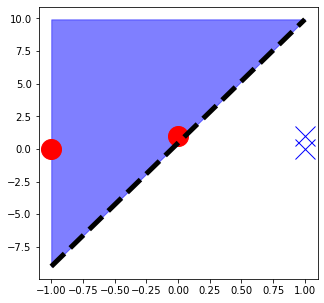

In [19]:
p1.visualize(True)